In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [22]:
means = np.array([[2, 2], [8, 3], [3, 6]])
cov = np.array([[1, 0], [0, 1]])
X0 = np.random.multivariate_normal(means[0], cov, 100)
X1 = np.random.multivariate_normal(means[1], cov, 100)
X2 = np.random.multivariate_normal(means[2], cov, 100)

X = np.concatenate((X0, X1, X2), axis = 0) # ghép 3 ma trận theo chiều dọc
K = 3
original_label = np.asarray([0]*100 + [1]*100 + [2]*100).T # tạo mảng 1 chiều 300 phần tử với 100 phần tử 0, 100 phần tử 1, 100 phần tử 2 để làm nhãn

In [23]:
def display_data(X, label, centers = None):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    if centers is not None:
        plt.plot(centers[:, 0], centers[:, 1], 'y*', markersize = 20, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

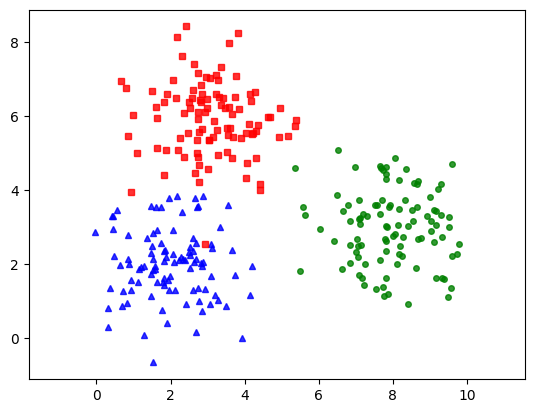

In [24]:
display_data(X, original_label)

In [25]:
def kmeans_init_centers(X, k):
    # chọn ngẫu nhiên k điểm từ tập dữ liệu làm các centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [26]:
def kmeans_assign_labels(X, centers):
    # tính toán khoảng cách từ các điểm dữ liệu đến các centers
    D = cdist(X, centers)
    # trả về chỉ số của center gần nhất
    return np.argmin(D, axis = 1)

In [27]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # lấy các điểm dữ liệu được gán nhãn k
        Xk = X[labels == k, :]
        # tính trung bình các điểm dữ liệu này
        centers[k, :] = np.mean(Xk, axis = 0)
    return centers

In [28]:
def has_converged(centers, new_centers):
    # kiểm tra điều kiện dừng của thuật toán
    return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])

In [29]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)] # khởi tạo các centers
    labels = [] # khởi tạo mảng chứa nhãn của các điểm dữ liệu
    it = 0 # số lần lặp
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1])) # gán nhãn các điểm dữ liệu
        new_centers = kmeans_update_centers(X, labels[-1], K) # cập nhật centers
        if has_converged(centers[-1], new_centers): # kiểm tra điều kiện dừng
            break
        centers.append(new_centers) # cập nhật centers
        it += 1 # tăng số lần lặp
    return centers, labels, it # trả về centers và nhãn của các điểm dữ liệu

Các centers sau khi hội tụ:
[[1.99942868 2.03875716]
 [3.12850183 5.96119944]
 [7.98281618 2.98255485]]


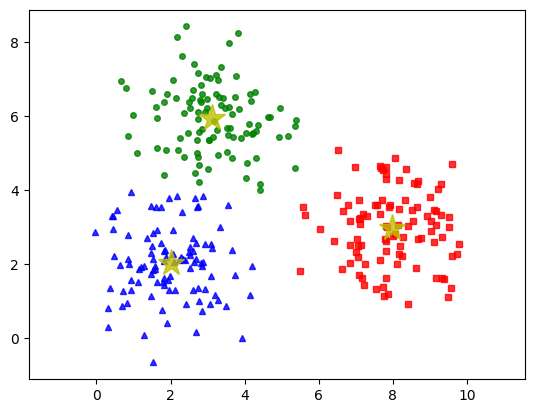

In [30]:
centers, labels, it = kmeans(X, K)
print('Các centers sau khi hội tụ:')
print(centers[-1])
display_data(X, labels[-1], centers[-1]) # hiển thị dữ liệu và centers